In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
# Setting dimensions for plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [25]:
# Reading CSV file
cars_data=pd.read_csv('cars_sampled.csv' )

In [26]:
# Creating copy
cars=cars_data.copy()

In [27]:
# Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [28]:
# Summarizing data

cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()


# To display maximum set of columns
pd.set_option('display.max_columns', 500)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [29]:
# Dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [30]:
# Removing duplicate records
cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records

C:\Users\Uday\AppData\Local\Temp\ipykernel_15708\3138404300.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])
C:\Users\Uday\AppData\Local\Temp\ipykernel_15708\3138404300.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])


5565

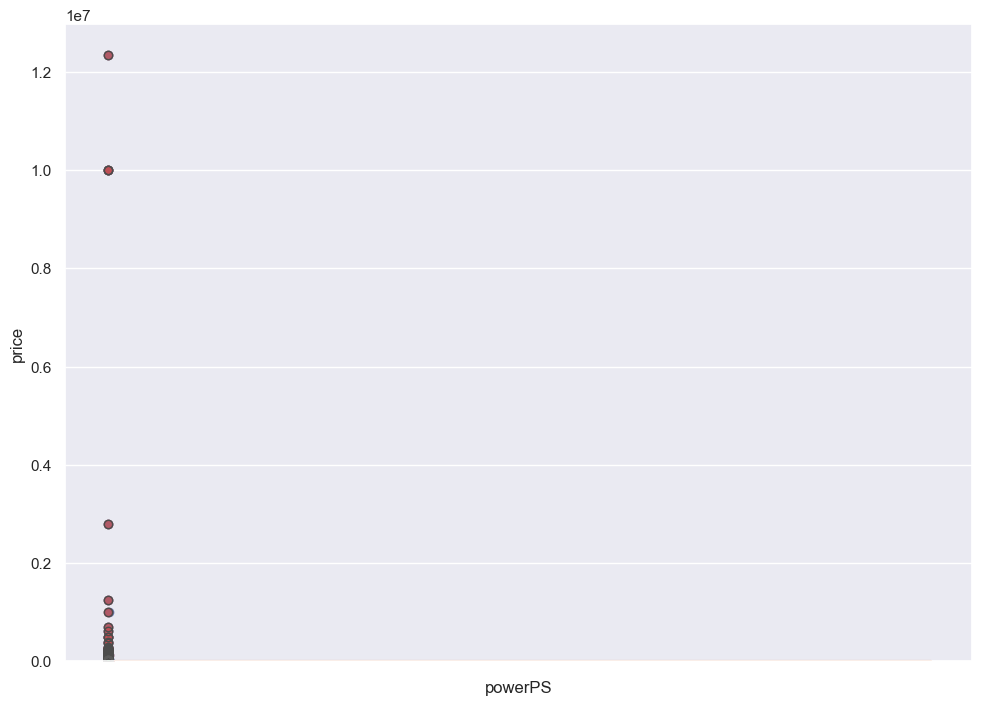

In [31]:
# Data cleaning

# No. of missing values in each column
cars.isnull().sum()


# Variable yearOfRegistration
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Working range- 1950 and 2018

# Variable price
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000


# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

C:\Users\Uday\AppData\Local\Temp\ipykernel_15708\3371218008.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Age'])
C:\Users\Uday\AppData\Local\Temp\ipykernel_15708\3371218008.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])
C:\Users\Uday\AppData\Local\Temp\ipykernel

<Axes: xlabel='kilometer', ylabel='price'>

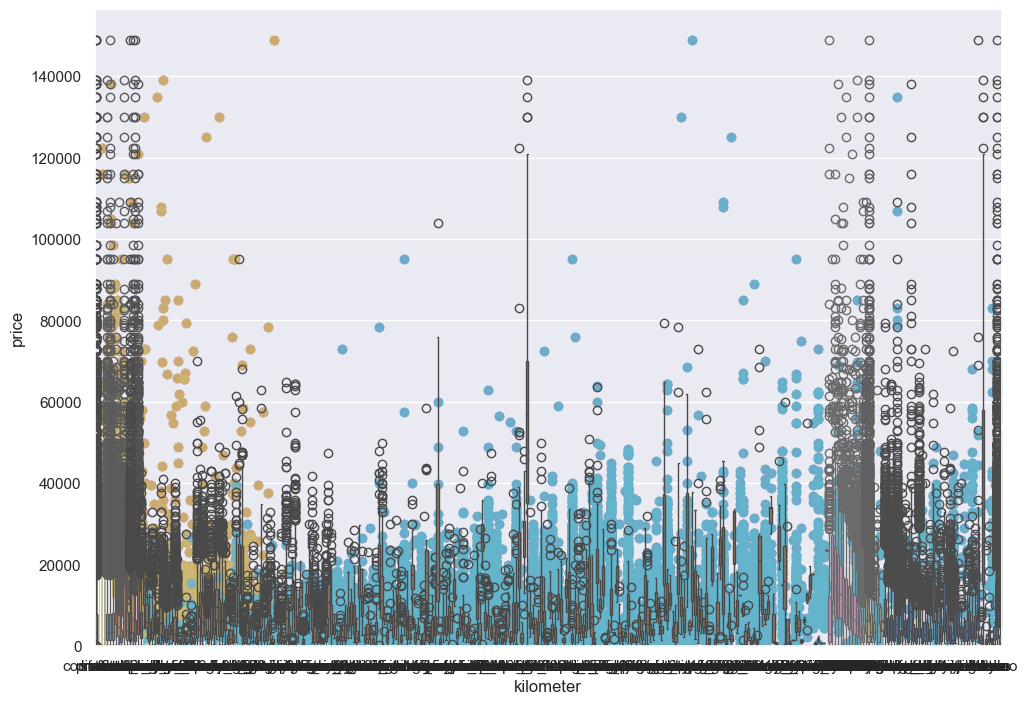

In [32]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()



# Visualizing parameters 

# Age
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

# price
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

# powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['price'])


# Visualizing parameters after narrowing working range
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)

# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age


# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)# Dropping yearOfRegistration and monthOfRegistration



# Visualizing parameters 

# Age
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

# price
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

# powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['price'])


# Visualizing parameters after narrowing working range
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Cars priced higher are newer
# With increase in age, price decreases
# However some cars are priced higher with increase in age


# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)
# Fewer cars have 'commercial'=> Insignificant


# Variable offerType
cars['offerType'].value_counts()
sns.countplot(x= 'offerType',data=cars)
# All cars have 'offer'=> Insignificant

# Variable abtest
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant


# Variable vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)
sns.boxplot(x= 'vehicleType',y='price',data=cars)
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price 

# Variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price 


# Variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x= 'model',data=cars)
sns.boxplot(x= 'model',y='price',data=cars)
# Cars are distributed over many models
# Considered in modelling


# Variable kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x= 'kilometer',y='price',data=cars)
cars['kilometer'].describe()
sns.distplot(cars['kilometer'],bins=8 ,kde=False)
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Considered in modelling
# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x= 'fuelType',data=cars)
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price

# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x= 'brand',data=cars)
sns.boxplot(x= 'brand',y='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling 

# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges


In [33]:
# Removing insignificant variables
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [34]:
# Correlation
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:] 

powerPS               0.575
kilometer             0.440
yearOfRegistration    0.338
Age                   0.336
monthOfRegistration   0.050
Name: price, dtype: float64

(23018, 302) (9866, 302) (23018,) (9866,)
8.249615787653267
1.1274483657478247
0.5441307172373603
0.7670765769571648 0.7809059791496804


count   9866.000
mean       0.003
std        0.544
min       -5.757
25%       -0.257
50%        0.040
75%        0.296
max        4.584
Name: price, dtype: float64

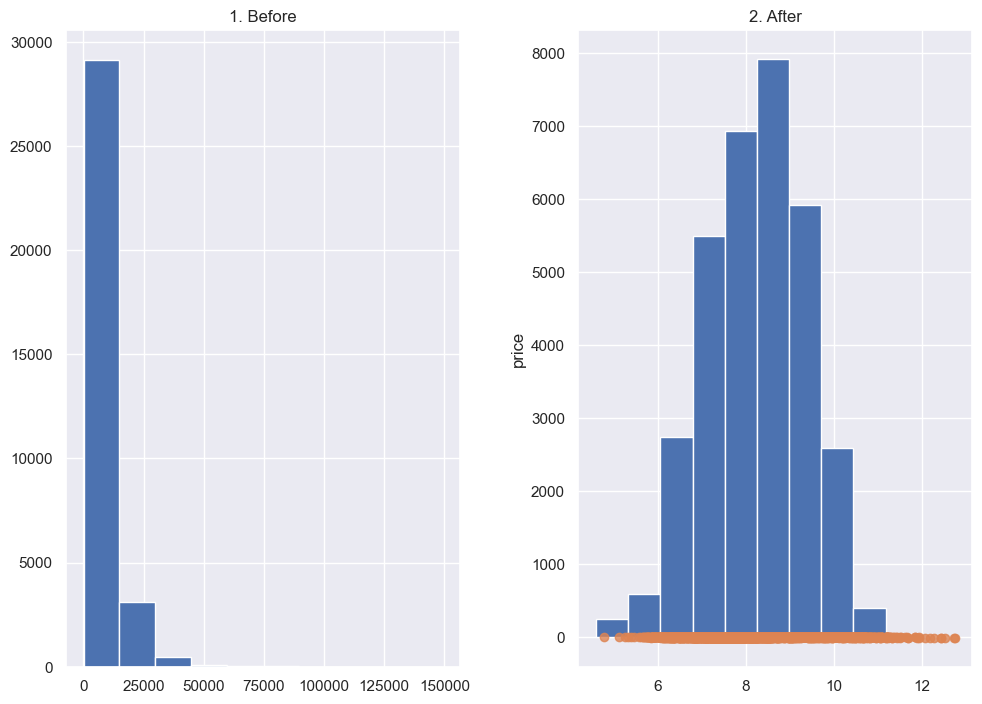

In [35]:
"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 
"""
# OMITTING MISSING VALUES
cars_omit=cars.dropna(axis=0)

# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

# IMPORTING NECESSARY LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# MODEL BUILDING WITH OMITTED DATA
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

# Transforming price as a logarithmic value
y1 = np.log(y1)

# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# BASELINE MODEL FOR OMITTED DATA
"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

# LINEAR REGRESSION WITH OMITTED DATA

# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

# Model
model_lin1=lgr.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()

In [41]:
# RANDOM FOREST WITH OMITTED DATA

# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf1=rf.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   





0.4611294571492223
0.8327167685761881 0.8556840828534888


In [42]:

# MODEL BUILDING WITH IMPUTED DATA

cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

In [43]:
# BASELINE MODEL FOR IMPUTED DATA

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)


8.068391740519065
1.1884349112889792


(29940, 305) (12832, 305) (29940,) (12832,)


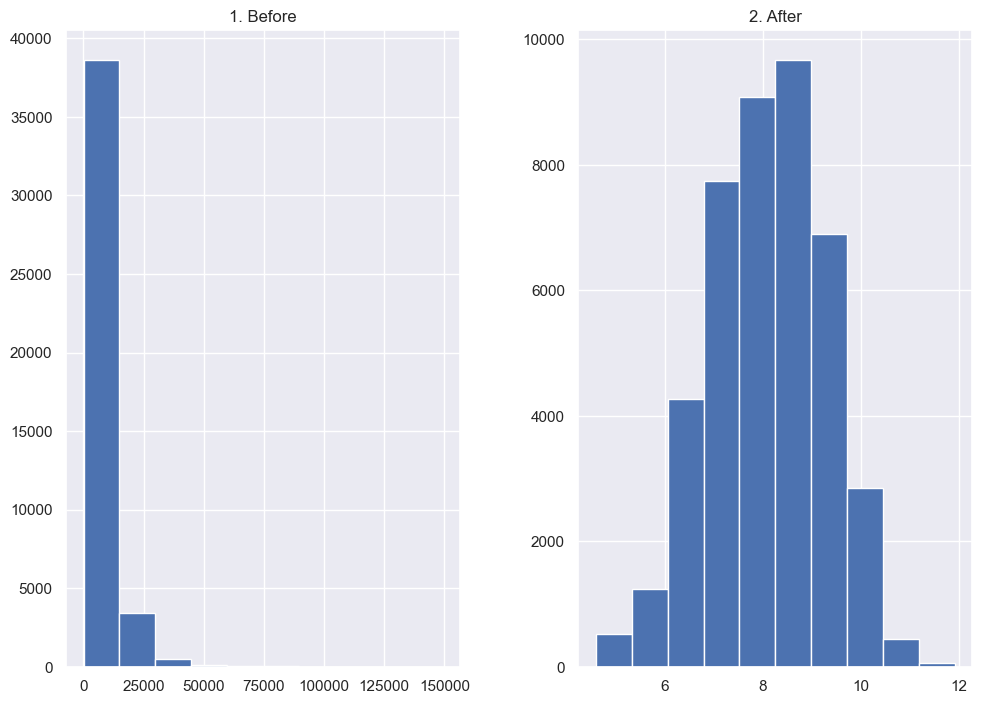

In [44]:
# MODEL BUILDING WITH IMPUTED DATA

# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

# Transforming price as a logarithmic value
y2 = np.log(y2)

# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


In [45]:
# LINEAR REGRESSION WITH IMPUTED DATA

# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

# Model
model_lin2=lgr2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.6457802770230027
0.7047303891046974 0.7090411861041864


In [47]:
# RANDOM FOREST WITH IMPUTED DATA

# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf2=rf2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.5350643945459926
0.7972964745381136 0.8221690318545435


In [48]:
# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7809059791496804
R squared value for test from Linear Regression=  0.7670765769571648
R squared value for train from Random Forest=  0.8556840828534888
R squared value for test from Random Forest=  0.8327167685761881
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5441307172373603
RMSE value for test from Random Forest=  0.4611294571492223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7090411861041864
R squared value for test from Linear Regression=  0.7047303891046974
R squared value for train from Random Forest=  0.8221690318545435
R squared value for test from Random Forest=  0.7972964745381136
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for te